# **Title of Project:** Automobile Mileage Prediction

# **Objective:** To find the mileage of the automobile using Linear Regression model

# **Data Source**: From Kaggle
'https://www.kaggle.com/datasets/saigeethac/autompg?resource=download%27'

## **Import Library**

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

## **Import Data**

In [32]:
mileage = pd.read_csv('auto-mpg.csv')

In [33]:
mileage.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [34]:
mileage.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [35]:
mileage.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## **Describe Data**

In [36]:
mileage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [37]:
mileage.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.115578,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.334820,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## **Data Preprocessing**

In [38]:
mileage = mileage.dropna()

In [39]:
mileage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


## **Data Visualization**

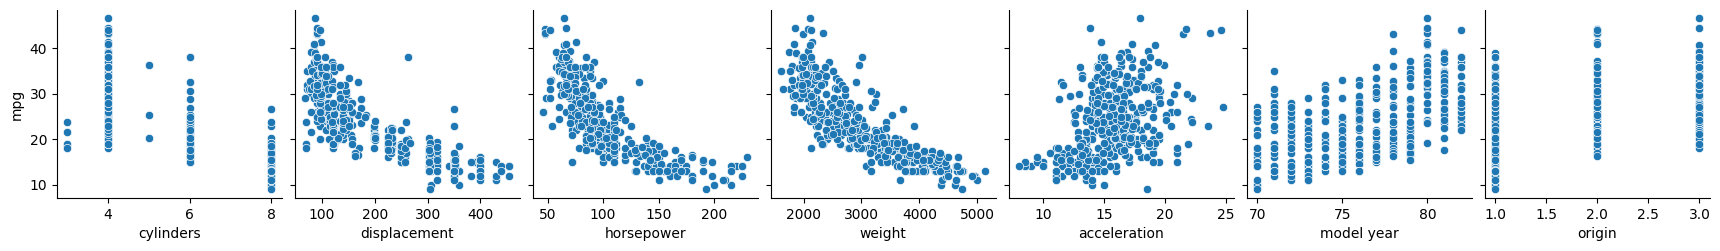

In [40]:
sns.pairplot(mileage, x_vars = ['cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model year', 'origin'], y_vars= ['mpg']);

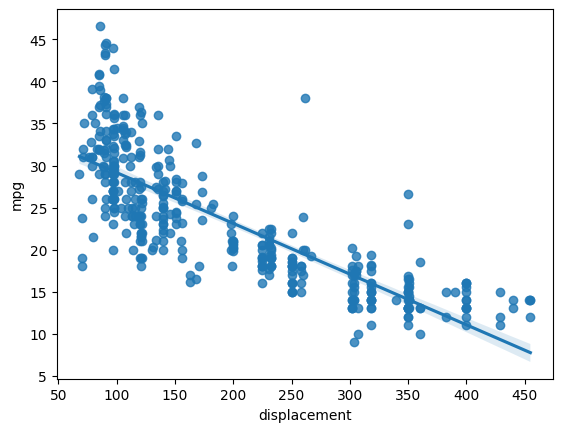

In [41]:
sns.regplot(x= 'displacement', y= 'mpg', data= mileage);

## **Define Target Variable (y) and Feature Variables (X)**

In [42]:
y = mileage['mpg']
x = mileage[['cylinders', 'displacement', 'weight','acceleration', 'model year', 'origin']]

## **Train Test Split**

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

## **Modeling**

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()

## **Model Training**

In [47]:
model.fit(x_train,y_train)

LinearRegression()

In [48]:
model.intercept_

-21.05812367633514

In [49]:
model.coef_

array([-0.44690628,  0.01281096, -0.00641996,  0.15148398,  0.77749046,
        1.34625802])

## **Prediction**

In [50]:
y_pred = model.predict(x_test)

# **Model Evaluation**

In [51]:
from sklearn.metrics import mean_absolute_percentage_error

In [52]:
mean_absolute_percentage_error(y_test,y_pred)

0.1244141574944031

## **Explaination**

Import library: Import the required library for machine learning such as pandas, numpy, matplotlib and seaborn.

Data Collection: The first step is gathering a dataset containing information about various automobiles along with their corresponding MPG values. This dataset should include a variety of features that could potentially influence fuel efficiency.

Data Preprocessing: Once you have your dataset, you'll need to clean and preprocess the data. This might involve handling missing values, encoding categorical variables, and scaling numerical features to ensure they're on similar scales.

Model Selection: After preprocessing the data, you'll choose a suitable machine learning model for the task. Common choices for regression tasks like this include linear regression, decision trees, random forests, and gradient boosting models.

Training the Model: With your chosen model selected, you'll train it on the preprocessed data. During training, the model will learn the patterns and relationships between the input features and the target variable (MPG) from the dataset.

Model Evaluation: Once the model is trained, you'll evaluate its performance using a separate validation dataset or through techniques like cross-validation. Common evaluation metrics for regression tasks include mean squared error (MSE), mean absolute error (MAE), and R-squared.